# Model Seçimi 

## Genelde çok sayıda bağımsız değişken arasından bağımlı değişkeni en iyi tahmin edecek kombinasyonu bulmaya çalışırız . Bunun için iki genel yöntem vardır . İlk olarak bütün değişkenler arasında olası tüm kombinasyonlar denenir ve en iyi sonuç veren model seçilir.

## Kapsamlı arama olarak isimlendirilen bu yöntem sonuç açısından en sağlıklı yöntem olsa da program çalışma süresi çok uzun olacağı için uygulanması pek mümkün değildir.
<br>


## Örneğin 25 tane bağımsız değişken arasından en iyi sonucu verecek kombinasyonu bulmak için 2 değişkenli modellerden başlayarak değişken sayısını birer arttırdığımızı varsayalım. Örneğin 5 değişkenli modellerin hepsini hesaplamak için olası model sayısı
### (25 5 )  =   (25! / 20!5!) = 53.310 olacaktır .

In [1]:
import numpy as np
import pandas as pd
degisken = pd.DataFrame({
    "Degisken Sayisi" : [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "Model Sayisi" : [300,2.3,12.65,53.13,177.1,480.7,1081.575,2042.975,3268.760,4457.400,5200.300,5200.30,4457.400,3268.760]
    
})

In [2]:
degisken

,Degisken Sayisi,Model Sayisi
0,2,300.000
1,3,2.300
2,4,12.650
3,5,53.130
4,6,177.100
5,7,480.700
6,8,1081.575
7,9,2042.975
8,10,3268.760
9,11,4457.400


## 20 değişken seçeceğimizi varsayarsak 33.554.406 model olacaktır . Bir modelin 0.1 saniyede hesaplandığını varsayarsak toplam hesaplanmasüresi 39 gün olacaktır bundan dolayı bütün değişkenleri eleme sürecinden geçirmek pek mümkün değildir. 
## Uygulanacak bir çözüm bağımsız değişkenlerin her birinin bağımlı değişkenle korelasyonuna bakarak en yüksek korelasyona sahip değişkenleri seçmek olabilir.

<br>


##  Bir diğer kullanılan genel yöntem ise adım adım model seçme yöntemi (stepwise) model seçme olarak isimlendirilir. 
## Bu yöntemde iki değişkenli modellerden başlayarak her  defasında en iyi modeli seçip bir değişken ekleyerek adım adım ilermektir. Yine 25 bağımsız değişkenimizin olduğunu varsayalım iki değişkenli tüm modeller incelenerek başarı yöntemlerine göre en iyi model seçilir ve geriye kalan değişkenler bu modele tek tek eklenerek önceki modele göre gelişme olup olmadığı test edilir. Bu ekleme işlemi model performansı gelişmeye devam ettikçe devam eder.

<br>
<br>

## Model başarı değerlendirme yöntemlerine göz atıp devam edelim .

<br>
<br>

# --------------------------------------------------------------------------------------------

## Model Başarı Değerlendirme Yöntemleri


## R² 

### R² belirtme katsayısı , açıklama oranı olarak adlandırılır. Bağımlı değişkendeki değişimin yüzde kaçı bağımsız değişken tarafından açıklanmaktadır sorusunun cevabını verir . 
### SSr = Regresyon Kareler Toplamı 
### SSt = Toplam Kareler Toplamı
### SSres = Hata Kareler Toplamı

### R² = 1 - SSres / SSt ya da SSr / SSt olarak hesaplanır.


In [3]:
import pandas as pd
import math

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv("C:/Users/can/Desktop/housing.csv",names = column_names,delimiter=r"\s+")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
y = boston["MEDV"]
X = boston.drop("MEDV",axis=1)


In [5]:
model = LinearRegression().fit(X,y)

In [6]:
yh = model.predict(X)
SSres = sum((y-yh)**2)
SSt = sum((y-np.mean(y))**2)
SSr = SSt - SSres 
R2 = 100*(SSr / SSt)
print(" Açıklanma yüzdesi : %.2f" % R2)

 Açıklanma yüzdesi : 74.06


In [7]:
model.score(X,y) #şeklinde de hesaplanabilir.

0.7406426641094094

<br>
<br>

# Düzeltilmiş R² 
### R²'nin olumsuz tarafı modele değişken eklendikçe artmasıdır bu olumsuzluğu ortadan kaldırmak için R² değeri hesaplanır.

### n = Gözlem sayısı
### k = X sayısı(Bağımsız değişken sayısı)
### p = k-1
<br>
<br>


### Düzeltilmiş R² = 1 - SSres / (n-p) / SSt/(n-1)
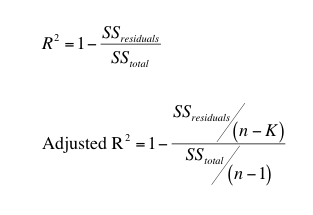

In [8]:
n = len(y)
k = X.shape[1]
p = k-1
adj_R2 = 100*(1-(SSres / (n-p)) / (SSt / n-1))
print("Düzeltilmiş R² =  %.2f" % adj_R2)

Düzeltilmiş R² =  73.12


<br>
<br>

## Bir modelin başarısını ölçmek için kullanılabilecek farklı ölçütler de vardır . Bu ölçütler genel olarak fazla değişken sayısını cezalandırarak gereksiz değişkenlerin yer almasını engeller.

<br>

# Mallow Cp:
### Cp hesaplamasında SSres değerine 2pϭ² değeri eklenerek gereksiz bağımsız değişken sayısı arttıkça Cp değerinin artması sağlanır.

## n = Gözlem sayısı
## k = X sayısı(Bağımsız değişken sayısı)
## Sigma kare(ϭ²) = Hata terimlerinin standart sapmanın karesidir.Yani varyans değeridir. Ya da Hata Kareler Ortalamasıdır.
## Cp = 1/n * (SSres + 2 * k * ϭ²) 

In [9]:
y = boston["MEDV"]
X = boston.drop("MEDV",axis=1)
model = LinearRegression().fit(X,y)

In [10]:
n = len(y)
k = X.shape[1]
y_tahmin = model.predict(X)
SSres = sum((y-y_tahmin)**2)
var = np.var(y-y_tahmin)
cp = (SSres + 2 * k * var ) / n
print("Cp değeri: ",cp)

Cp değeri:  23.019862032964337


### Mallow's Cp değerinin farklı formülleri bulunmaktadır fakat farklı modellerin sıralanmasında aynı sonucu verdikleri için bu farklılık önem taşımamaktadır.

<br>

# Akaike Bilgi Kriteri (AIC , Akaike Information Criterion)
### Cp ve AIC orantılı sonuc verir ve aynı şekilde yorumlanır.
## AIC = 1/n*ϭ² / (SSres +2 * k * ϭ²)


In [11]:
n = len(y)
k = X.shape[1]
y_tahmin = model.predict(X)
SSres = sum((y-y_tahmin)**2)
var = np.var(y-y_tahmin)
AIC = (SSres + 2 * k * var ) / n*var
print("AIC değeri: ",AIC)

AIC değeri:  504.01599303845256


<br>

# Bayes Bilgi Kriteri(BIC , Bayesian Information Criterion):
### BIC modelin SSres değerine ln(n)*k* ϭ² kadar ceza puanı ekler. Buradaki ln(n) modeldeki gözlem sayısının doğal logaritmasını ifade eder. Bu nedenle gözlem sayısı 7'den büyükse ln(n) değeri de 2'den büyük olur ve modele eklenen ceza puanı AIC'e göre fazla olacaktır.

## BIC = 1/n*ϭ² / (SSres + ln(n) * 2 * k * ϭ²)


In [12]:
n = len(y)
k = X.shape[1]
y_tahmin = model.predict(X)
ln = np.log(n)
SSres = sum((y-y_tahmin)**2)
var = np.var(y-y_tahmin)
BIC = (SSres + ln * 2 * k * var ) / n*var
print("BIC değeri: ",BIC)

BIC değeri:  632.7579287670108


# --------------------------------------------------------------------------------------------

<br>

## Model değerlendirme yöntemlerine değindiğimize göre model seçimi konusuna devam edelim.

## Yukarıda anlatılan yöntem ileri adım adım seçme yöntemidir. Bu yönteme benzer olarak diğer bir yöntem ise geriye adım adım model seçme yöntemidir. Bu yöntemde önce tüm değişkenler modelde yer alır sonrasında değişkenler bir bir çıkarılarak en iyi model bulunur.

## Adım adım yöntemleri diğer yönteme göre daha hızlı verse bile bu yöntem her zaman en iyi modeli vermeyebilir. Örneğin iki değişkenli model olan XY modeli yerine UV modeli ile devam etmiş olabiliriz. Amcal XY sonraki adımlarda bir başka değişkenlerle birlikte daha iyi sonuç veriyor olabilir. Biz UV ile devam ederek bunu göz ardı ederiz.

<br>

## Model seçiminde kullanılan bir başka yaklaşım ise tüm değişkenleri kullanan ancak gereksiz değişkenlere 0 veya 0'a yakın değerler veren bağlanım yöntemleridir.

<br>
<br>

# Ridge Yöntemi

## Ridge Yöntemi SSres(Hata Kareler Toplamı) terimine yeni bir terim ekleyerek modele katkısı olmayan değişkelerin beta katsayılarını küçültmeyi amaçlar . 

<br>

## SSres +  α∑(j=1'den k'ya kadar) βj²

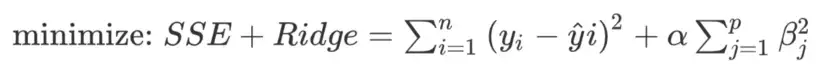

## α katsayısı SSres'e eklenen bir ceza olarak düşünülebilir. α yardımıyla beta katsayıları küçültülmüş olur . Eğer α sıfır olursa sonuç da En Küçük Kareler toplamı ile aynı olur . 
<br>

## α değeri büyüdükçe beta katsayıları sıfıra yaklaşır. Bundan dolayı seçilecek α katsayısı çok önemlidir . En başarılı sonucu çarpaz doğrulama yöntemleri kullanarak bulabilir . (Cross Validation)


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_degerler = np.logspace(-4,0.1,100)
ridge_R2 = []
ridge_model = Ridge(random_state=45)


In [14]:
ridge_first_model = Ridge(random_state=45).fit(X,y)
ridgescore1 = ridge_first_model.score(X,y)
ridgescore1

0.7388703133867616

In [15]:
for alpha in alpha_degerler:
    ridge_model.alpha = alpha
    ridge_cv = cross_val_score(ridge_model,X,y,cv=5)
    ridge_R2.append(np.mean(ridge_cv))
    

In [16]:
ind = ridge_R2.index(max(ridge_R2))
ind

99

In [17]:
alpha_degerler[ind]

1.2589254117941673

In [18]:
ridge_final_model = Ridge(alpha=1.2589254117941673,random_state=45)
ridge_final_model.fit(X,y)


Ridge(alpha=1.2589254117941673, random_state=45)

In [19]:
ridge_final_model.score(X,y)

0.7383270778750595

In [20]:
ridge_final_model.intercept_

30.932346337634662

In [21]:
print(ridge_final_model.coef_)

[-1.04126361e-01  4.76039840e-02 -1.29625276e-02  2.52489277e+00
 -9.78055408e+00  3.85705515e+00 -6.25166773e-03 -1.35800114e+00
  2.88022545e-01 -1.30007939e-02 -8.65392041e-01  9.72391314e-03
 -5.34821215e-01]


In [22]:
ridgescore2 = ridge_final_model.score(X,y)
ridgescore2

0.7383270778750595

In [23]:
print("Alpha değeri optimize edilmeden önceki belirtme katsayısı",ridgescore1 , "\nEn optimal alpha değeri bulunduktan sonraki belirtme katsayısı",ridgescore2)

Alpha değeri optimize edilmeden önceki belirtme katsayısı 0.7388703133867616 
En optimal alpha değeri bulunduktan sonraki belirtme katsayısı 0.7383270778750595


In [24]:
print("Belirtme katsayısı % ",100*(ridgescore2-ridgescore1),"azalmıştır.")

Belirtme katsayısı %  -0.05432355117021004 azalmıştır.


<br>
<br>

<br>
<br>

## Lasso Yöntemi

## Ridge Yöntemine çok benzer . Amaç yine modele katkısı en az olan değişkenlerin katsayısını küçültmektir. Ridge yöntemine göre avantajı sıfıra eşit katsayılar üreterek gereksiz değişkenlerin çıkarılmasına izin verilmesidir. Lassoda aşağıdaki değer en aza indirilmeye çalışılır. 

## SSres +  α∑(j=1'den k'ya kadar) |βj|

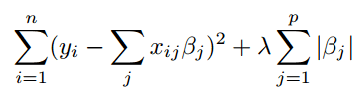

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [26]:
alpha_degerler = np.logspace(-4,30,300)
alpha_degerler
lasso_R2 = []
lasso_model = Lasso(random_state=45)

In [27]:
lasso_first_model = Lasso(random_state=45).fit(X,y)
lassoscore1 = lasso_first_model.score(X,y)
lassoscore1

0.6825842212709925

In [28]:
for alpha in alpha_degerler:
    lasso_model.alpha = alpha
    lasso_cv = cross_val_score(lasso_model,X,y,cv=5)
    lasso_R2.append(np.mean(lasso_cv))
    

In [29]:
ind = lasso_R2.index(max(lasso_R2))
ind

35

In [30]:
alpha_degerler[ind]

0.9548455102782284

In [31]:
lasso_final_model = Ridge(alpha=0.859693086719078,random_state=45)
lasso_final_model.fit(X,y)


Ridge(alpha=0.859693086719078, random_state=45)

In [32]:
lasso_final_model.intercept_

32.02364004922876

In [33]:
lasso_final_model.coef_

array([-1.04895135e-01,  4.73445974e-02, -6.17177518e-03,  2.56814477e+00,
       -1.14067231e+01,  3.85142458e+00, -4.87887753e-03, -1.38191641e+00,
        2.91510031e-01, -1.28566617e-02, -8.82873898e-01,  9.64109370e-03,
       -5.32459699e-01])

In [34]:
lassoscore2 = lasso_final_model.score(X,y)
lassoscore2


0.739175880801628

In [35]:
print("Alpha değeri optimize edilmeden önceki belirtme katsayısı",lassoscore1 , "\nEn optimal alpha değeri bulunduktan sonraki belirtme katsayısı",lassoscore2)

Alpha değeri optimize edilmeden önceki belirtme katsayısı 0.6825842212709925 
En optimal alpha değeri bulunduktan sonraki belirtme katsayısı 0.739175880801628


In [36]:
print("Belirtme katsayısı %",100*(lassoscore2-lassoscore1),"artmıştır.")

Belirtme katsayısı % 5.65916595306355 artmıştır.


In [37]:
print("Ridge ve Lasso belirtme katsayıları arasında %",100*(lassoscore2 - ridgescore2),"fark vardır.")

Ridge ve Lasso belirtme katsayıları arasında % 0.0848802926568526 fark vardır.
